# DevTools Protocol 로 네트워크recieve 정보 가져오기

https://www.naver.com/
https://ssl.pstatic.net/sstatic/search/pc/css/sp_autocomplete_240725.css
https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-loader.js
https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js
https://ssl.pstatic.net/tveta/libs/assets/js/pc/main/min/pc.veta.core.min.js
https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js
https://pm.pstatic.net/resources/js/preload.c6b0ed48.js?o=www
https://ssl.pstatic.net/tveta/libs/glad/prod/2.29.0/gfp-sdk.js
https://pm.pstatic.net/resources/js/polyfill.a163af38.js?o=www
https://pm.pstatic.net/resources/js/search.390983ad.js?o=www
https://pm.pstatic.net/resources/js/main.7e5082d3.js?o=www
https://pm.pstatic.net/resources/css/main.6efa9308.css
https://pm.pstatic.net/resources/asset/sp_main.3e7d337e.png
https://ssl.pstatic.net/melona/libs/gfp-nac-module/synchronizer.js
https://ssl.pstatic.net/tveta/libs/glad/prod/2.29.0/gfp-logger.js
https://ssl.pstatic.net/tveta/libs/glad/prod/2.29.0/gfp-sentry-bundle-1.0.1.js
https://shopsqu
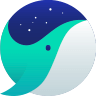
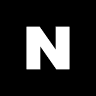

In [6]:
from webdriver_manager.chrome import ChromeDriverManager
import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import json
# 크롬 드라이버 자동 설치
chromedriver_autoinstaller.install()

# 크롬 옵션 설정
options = webdriver.ChromeOptions()
options.set_capability('goog:loggingPrefs', {'performance': 'ALL'})
options.add_argument('--headless')  # 브라우저를 표시하지 않고 실행
options.add_argument('--disable-web-security')  # CORS 정책 우회 설정
options.add_argument('--ignore-certificate-errors')  # SSL 인증서 무시 설정

# 드라이버 초기화
driver = webdriver.Chrome(options=options)

# get log
driver.get('https://naver.com')  # 대상 웹사이트로 변경

for log in driver.get_log('performance'):
    message = json.loads(log["message"])["message"]
    if "Network.responseReceived" == message["method"]:
        url = message['params']['response']['url']
        print(url)

driver.quit()



# MIMI Type 별 리소스 크기 가져오기 (정확히 타입 구분가능)

URL: https://www.naver.com/, MIME Type: text/html, Size: 0 bytes
URL: https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-loader.js, MIME Type: application/javascript, Size: 0 bytes
URL: https://ssl.pstatic.net/sstatic/search/pc/css/sp_autocomplete_240725.css, MIME Type: text/css, Size: 0 bytes
URL: https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js, MIME Type: application/javascript, Size: 0 bytes
URL: https://pm.pstatic.net/resources/css/main.6efa9308.css, MIME Type: text/css, Size: 0 bytes
URL: https://ssl.pstatic.net/tveta/libs/assets/js/pc/main/min/pc.veta.core.min.js, MIME Type: application/javascript, Size: 0 bytes
URL: https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js, MIME Type: application/javascript, Size: 0 bytes
URL: https://ssl.pstatic.net/tveta/libs/glad/prod/2.29.0/gfp-sdk.js, MIME Type: application/javascript, Size: 0 bytes
URL: https://pm.pstatic.net/resources/js/search.390983ad.js?o=www, MIME Type: application/javascript, Size: 0 bytes
URL: https://pm.p
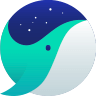
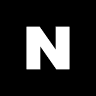

In [8]:
from webdriver_manager.chrome import ChromeDriverManager
import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import json

# 크롬 드라이버 자동 설치
chromedriver_autoinstaller.install()

# 크롬 옵션 설정
options = webdriver.ChromeOptions()
options.set_capability('goog:loggingPrefs', {'performance': 'ALL'})
options.add_argument('--headless')  # 브라우저를 표시하지 않고 실행
options.add_argument('--disable-web-security')  # CORS 정책 우회 설정
options.add_argument('--ignore-certificate-errors')  # SSL 인증서 무시 설정

# 드라이버 초기화
driver = webdriver.Chrome(options=options)

# 네트워크 로그 수집
driver.get('https://naver.com')  # 대상 웹사이트로 변경

resource_types = {'Document': 0, 'Stylesheet': 0, 'Script': 0, 'Image': 0, 'Media': 0, 'Other': 0}
total_size = 0

for log in driver.get_log('performance'):
    message = json.loads(log["message"])["message"]
    if "Network.responseReceived" == message["method"]:
        url = message['params']['response']['url']
        mime_type = message['params']['response']['mimeType']
        resource_size = message['params']['encodedDataLength'] if 'encodedDataLength' in message['params'] else 0

        # MIME 타입에 따라 리소스 유형을 결정
        if 'text/html' in mime_type:
            resource_types['Document'] += resource_size
        elif 'text/css' in mime_type:
            resource_types['Stylesheet'] += resource_size
        elif 'application/javascript' in mime_type or 'application/x-javascript' in mime_type:
            resource_types['Script'] += resource_size
        elif 'image' in mime_type:
            resource_types['Image'] += resource_size
        elif 'video' in mime_type or 'audio' in mime_type:
            resource_types['Media'] += resource_size
        else:
            resource_types['Other'] += resource_size

        total_size += resource_size
        print(f"URL: {url}, MIME Type: {mime_type}, Size: {resource_size} bytes")

# 드라이버 종료
driver.quit()

# 결과 출력
print("##### Resource Sizes: ######")
for resource_type, size in resource_types.items():
    print(f"{resource_type}: {size} bytes")

print(f"Total Network Size: {total_size} bytes")


# 그런데, 정확한 리소스 사이즈를 계산하지 못 함( 전부 0으로 나옴) 
그러면, 네트워크 로그에서 리소스 사이즈를 가져오는 방법은 없을까?


URL: https://www.naver.com/, MIME Type: text/html, Size: 254956 bytes
URL: https://ssl.pstatic.net/sstatic/search/pc/css/sp_autocomplete_240725.css, MIME Type: text/css, Size: 51048 bytes
URL: https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-loader.js, MIME Type: application/javascript, Size: 1170 bytes
URL: https://pm.pstatic.net/resources/css/main.6efa9308.css, MIME Type: text/css, Size: 587060 bytes
URL: https://ssl.pstatic.net/tveta/libs/assets/js/pc/main/min/pc.veta.core.min.js, MIME Type: application/javascript, Size: 31317 bytes
URL: https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js, MIME Type: application/javascript, Size: 48141 bytes
URL: https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js, MIME Type: application/javascript, Size: 97170 bytes
URL: https://pm.pstatic.net/resources/js/main.7e5082d3.js?o=www, MIME Type: application/javascript, Size: 750749 bytes
URL: https://ssl.pstatic.net/tveta/libs/glad/prod/2.29.0/gfp-sdk.js, MIME Type: application/javascript,
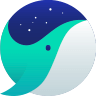
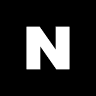

In [10]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import json

# 크롬 드라이버 자동 설치
chromedriver_autoinstaller.install()

# 크롬 옵션 설정
options = Options()
options.set_capability('goog:loggingPrefs', {'performance': 'ALL'})
options.add_argument('--headless')  # 브라우저를 표시하지 않고 실행
options.add_argument('--disable-web-security')  # CORS 정책 우회 설정
options.add_argument('--ignore-certificate-errors')  # SSL 인증서 무시 설정

# 드라이버 초기화
driver = webdriver.Chrome(options=options)

# 네트워크 로그 수집
driver.get('https://naver.com')  # 대상 웹사이트로 변경

resource_types = {'Document': 0, 'Stylesheet': 0, 'Script': 0, 'Image': 0, 'Media': 0, 'Other': 0}
total_size = 0

for log in driver.get_log('performance'):
    message = json.loads(log["message"])["message"]
    if "Network.responseReceived" == message["method"]:
        request_id = message['params']['requestId']
        url = message['params']['response']['url']
        mime_type = message['params']['response']['mimeType']

        # Fetch the network data
        response = driver.execute_cdp_cmd('Network.getResponseBody', {'requestId': request_id})
        resource_size = len(response['body']) if 'body' in response else 0

        # MIME 타입에 따라 리소스 유형을 결정
        if 'text/html' in mime_type:
            resource_types['Document'] += resource_size
        elif 'text/css' in mime_type:
            resource_types['Stylesheet'] += resource_size
        elif 'application/javascript' in mime_type or 'application/x-javascript' in mime_type:
            resource_types['Script'] += resource_size
        elif 'image' in mime_type:
            resource_types['Image'] += resource_size
        elif 'video' in mime_type or 'audio' in mime_type:
            resource_types['Media'] += resource_size
        else:
            resource_types['Other'] += resource_size

        total_size += resource_size
        print(f"URL: {url}, MIME Type: {mime_type}, Size: {resource_size} bytes")

# 드라이버 종료
driver.quit()

# 결과 출력
print("Resource Sizes:")
for resource_type, size in resource_types.items():
    print(f"{resource_type}: {size} bytes")

print(f"Total Network Size: {total_size} bytes")
